In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv(os.getcwd()+"\\Dataset\\train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df = data.dropna(thresh=data.shape[1] - 1)
df = df.drop(columns=['Loan_ID'])

In [6]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       43
Self_Employed        25
LoanAmount           19
Gender               12
Loan_Amount_Term     12
Dependents           10
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    object 
 1   Married            601 non-null    object 
 2   Dependents         591 non-null    object 
 3   Education          601 non-null    object 
 4   Self_Employed      576 non-null    object 
 5   ApplicantIncome    601 non-null    int64  
 6   CoapplicantIncome  601 non-null    float64
 7   LoanAmount         582 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     558 non-null    float64
 10  Property_Area      601 non-null    object 
 11  Loan_Status        601 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 61.0+ KB


# Fill value

In [8]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd

# # Load your dataset
# # df = pd.read_csv('your_data.csv')

# # Identify columns with null values
# null_cols = data.columns[df.isnull().any()]

# # Loop through null columns and fill with regression
# for col in null_cols:
#     # Split dataset into two groups: one with null values, and the other without
#     train = df[df[col].notnull()]
#     test = df[df[col].isnull()]

#     # Split dataset into independent and dependent variables
#     X_train = train.drop(col, axis=1)
#     y_train = train[col]
#     X_test = test.drop(col, axis=1)

#     # Train a linear regression model on the group without null values
#     model = LinearRegression().fit(X_train, y_train)

#     # Use the trained model to predict the dependent variable for the group with null values
#     y_pred = model.predict(X_test)

#     # Fill null values with predicted values
#     df.loc[df[col].isnull(), col] = y_pred

In [9]:
# perform label encoding
columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
en_data = df
for column in columns:
    le = LabelEncoder()
    en_data[column] = le.fit_transform(en_data[column])
en_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [10]:
en_data['Self_Employed'] = en_data['Self_Employed'].replace(2, np.nan)
en_data['Dependents'] = en_data['Dependents'].replace(4, np.nan)
en_data['Gender'] = en_data['Gender'].replace(2, np.nan)

In [11]:
en_data.isnull().sum().sort_values(ascending=False)

Credit_History       43
Self_Employed        25
LoanAmount           19
Gender               12
Loan_Amount_Term     12
Dependents           10
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       43
Self_Employed        25
LoanAmount           19
Gender               12
Loan_Amount_Term     12
Dependents           10
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
null_cols = en_data.columns[en_data.isnull().any()]
null_cols

Index(['Gender', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [14]:
train = en_data.dropna()
for col in null_cols:
    # Split dataset into two groups: one with null values, and the other without
    test = en_data[en_data[col].isnull()]
    print(f"{col} : {test.shape[0]}")
    #print(f"train : {train.shape[0]}")
    # Split dataset into independent and dependent variables
    X_train = train.drop(col, axis=1)
    y_train = train[col]
    X_test = test.drop(col, axis=1)

    #Train a linear regression model on the group without null values
    model = LinearRegression().fit(X_train, y_train)

    # Use the trained model to predict the dependent variable for the group with null values
    y_pred = model.predict(X_test)
    print(f"y_pred : {y_pred.shape[0]}")
    # Fill null values with predicted values
    en_data.loc[en_data[col].isnull(), col] = y_pred

Gender : 12
y_pred : 12
Dependents : 10
y_pred : 10
Self_Employed : 25
y_pred : 25
LoanAmount : 19
y_pred : 19
Loan_Amount_Term : 12
y_pred : 12
Credit_History : 43
y_pred : 43


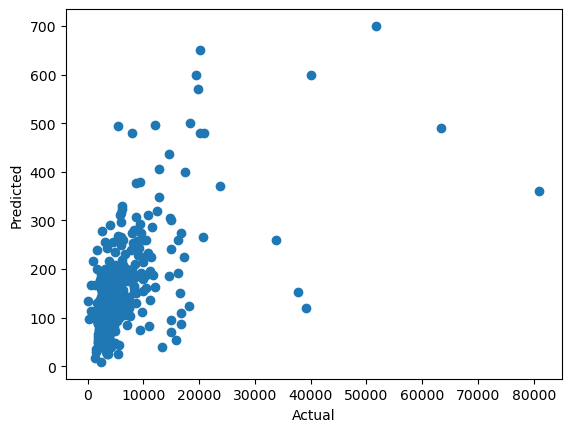

In [15]:
plt.scatter(en_data['ApplicantIncome'],en_data['LoanAmount']);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [16]:
en_data.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# index
for index, row in en_data.iterrows():
    if(en_data.loc[index, 'Gender']>0.5):
        en_data.loc[index, 'Gender'] = 1
        print(en_data.loc[index, 'Gender'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [19]:
for index, row in en_data.iterrows():
    if(en_data.loc[index, 'Credit_History']>0.5):
        en_data.loc[index, 'Credit_History'] = 1
        print(en_data.loc[index, 'Credit_History'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [20]:
for index, row in en_data.iterrows():
    en_data.loc[index, 'Dependents'] = int(en_data.loc[index, 'Dependents'])
    print(en_data.loc[index, 'Dependents'])

0.0
1.0
0.0
0.0
0.0
2.0
0.0
3.0
2.0
1.0
2.0
2.0
2.0
0.0
2.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
2.0
0.0
0.0
2.0
0.0
2.0
0.0
1.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
2.0
0.0
0.0
1.0
2.0
0.0
3.0
0.0
1.0
0.0
0.0
0.0
1.0
3.0
0.0
0.0
2.0
0.0
3.0
3.0
0.0
0.0
1.0
3.0
3.0
0.0
1.0
2.0
0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
1.0
2.0
0.0
2.0
3.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
2.0
0.0
0.0
3.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
2.0
0.0
2.0
2.0
0.0
0.0
0.0
2.0
0.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
3.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
3.0
3.0
0.0
0.0
0.0
2.0
3.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
2.0
3.0
1.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
1.0
3.0
0.0
3.0
0.0
0.0
2.0
2.0
0.0
2.0
0.0
0.0
0.0
0.0
1.0
2.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
2.0
1.0
0.0
2.0
0.0
0.0
2.0
1.0
1.0
0.0
0.0
2.0
0.0
1.0
0.0
3.0
0.0
3.0


In [21]:
for index, row in en_data.iterrows():
    en_data.loc[index, 'Self_Employed'] = int(en_data.loc[index, 'Self_Employed'])
    print(en_data.loc[index, 'Self_Employed'])

0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0


In [22]:
for index, row in en_data.iterrows():
    en_data.loc[index, 'Loan_Amount_Term'] = int(en_data.loc[index, 'Loan_Amount_Term'])
    print(en_data.loc[index, 'Loan_Amount_Term'])

360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
120.0
360.0
240.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
333.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
315.0
356.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
360.0
360.0
360.0
180.0
360.0
60.0
360.0
360.0
360.0
300.0
310.0
360.0
480.0
360.0
360.0
300.0
360.0
360.0
360.0
360.0
360.0
240.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
360.0
360.0
120.0
360.0
360.0
180.0
360.0
180.0
360.0
360.0
360.0
360.0
360.0
360.0
480.0
360.0
360.0
329.0
360.0
360.0
180.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
360.0
480.0
360.0
360.0
120.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
360.0
180.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
360.0
180.0
351.0
360.0
360.0
480.0
360.0
360.0
300.0
180.0

In [23]:
en_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,0.0,0,0.0,5849,0.0,111.038128,360.0,1.0,2,1
1,1.0,1,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [24]:
dump = en_data

In [25]:
columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
en_data = en_data.astype({"Gender": int, "Married": int, "Education": int, "Dependents": int, "Self_Employed": int, "Property_Area": int, "Loan_Status": int})
for column in columns:
    le = LabelEncoder()
    test = le.fit_transform(data[column])
    en_data[column] = le.inverse_transform(en_data[column])
en_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,111.038128,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [26]:
en_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,111.038128,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
# en_data.to_csv('preprocess.csv')
# en_data.to_csv('preprocessWithIndex.csv', index=False)

In [29]:
# #for numerical type
# data ['LoanAmount'] = data ['LoanAmount'].fillna(data ['LoanAmount'].mean())
# data ['Loan_Amount_Term'] = data ['Loan_Amount_Term'].fillna(data ['Loan_Amount_Term'].mean())
# data ['Credit_History'] = data ['Credit_History'].fillna(data ['Credit_History'].mean())

In [30]:
# #For ccategorical type 
# data ['Gender'] = data ['Gender'].fillna(data['Gender'].mode()[0])
# data ['Married'] = data ['Married'].fillna(data['Married'].mode()[0])
# data ['Dependents'] = data ['Dependents'].fillna(data['Dependents'].mode()[0])
# data ['Self_Employed'] = data ['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [31]:
# data.isnull().sum()

In [32]:
# data.info()

In [33]:
# weights = {
#     'ApplicantIncome': 0.3,
#     'Credit_History': 0.4,
#     'Property_Area_Rural': 0.1,
#     'Property_Area_Semiurban': 0.1,
#     'Property_Area_Urban': 0.1,
#     'Education': 0.1
# }

In [34]:
# # Normalize the weights
# total_weight = sum(weights.values())
# weights = {k: v/total_weight for k, v in weights.items()}

# # Convert the Property_Area column to dummy variables
# data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)

In [35]:
# # Calculate the content weight score for each row
# data['content_weight'] = (data['ApplicantIncome']*weights['ApplicantIncome'] +
#                         data['Credit_History']*weights['Credit_History'] +
#                         data['Property_Area_Rural']*weights['Property_Area_Rural'] +
#                         data['Property_Area_Semiurban']*weights['Property_Area_Semiurban'] +
#                         data['Property_Area_Urban']*weights['Property_Area_Urban'] +
#                         data['Education']*weights['Education'])

In [36]:
data = en_data

<AxesSubplot:xlabel='Gender', ylabel='count'>

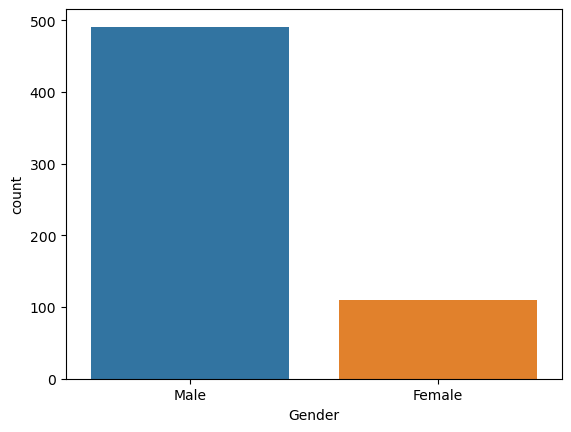

In [37]:
#for gender
sns.countplot(x='Gender',data=data)
#as we can see Male applicant is more as compared to Female

In [38]:
#How do women and men compare when it comes to defaulting on loans in the historical dataset?
comp=data[['Loan_Status','Gender']].value_counts().to_frame()
comp

,,0
Loan_Status,Gender,
Y,Male,340
N,Male,151
Y,Female,74
N,Female,36


<AxesSubplot:xlabel='Married', ylabel='count'>

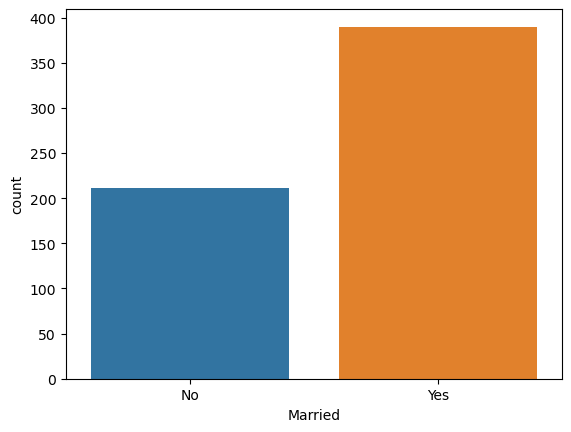

In [39]:
sns.countplot(x='Married',data=data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

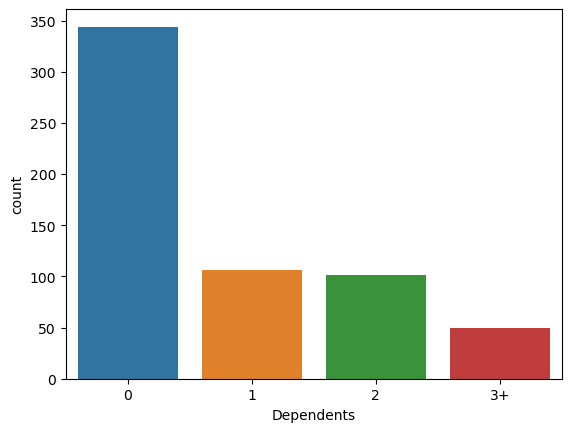

In [40]:
sns.countplot(x='Dependents',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

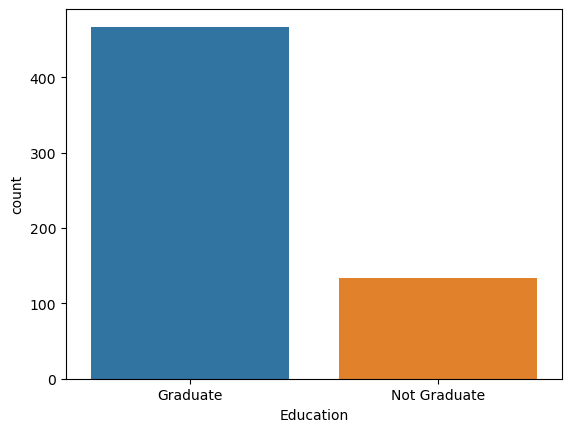

In [41]:
sns.countplot(x='Education',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

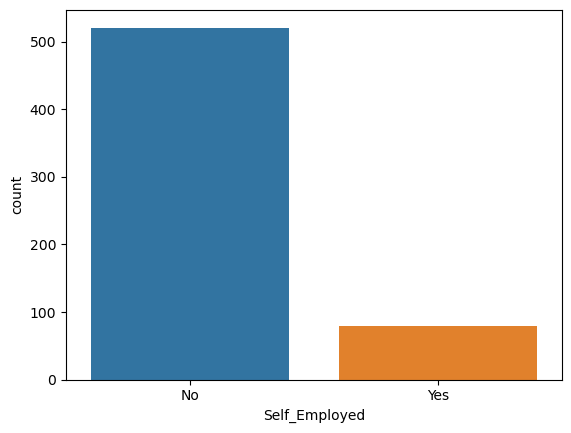

In [42]:
sns.countplot(x='Self_Employed',data=data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

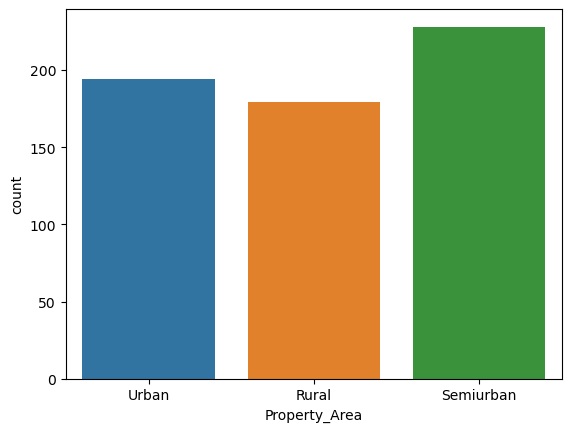

In [43]:
sns.countplot(x='Property_Area',data=data)

In [44]:
data['ApplicantIncome']= np.log(data['ApplicantIncome'])
data['CoapplicantIncome']= np.log(data['CoapplicantIncome']+1)
data['LoanAmount'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term']= np.log(data['Loan_Amount_Term'])

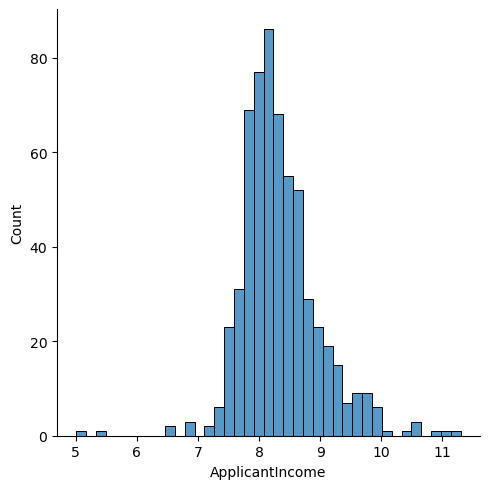

In [45]:
sns.displot(data['ApplicantIncome'])

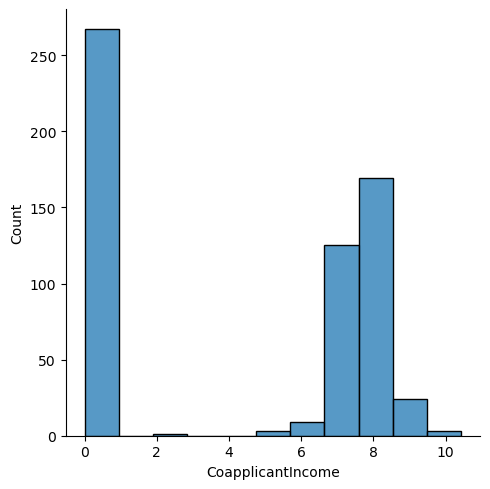

In [46]:
sns.displot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

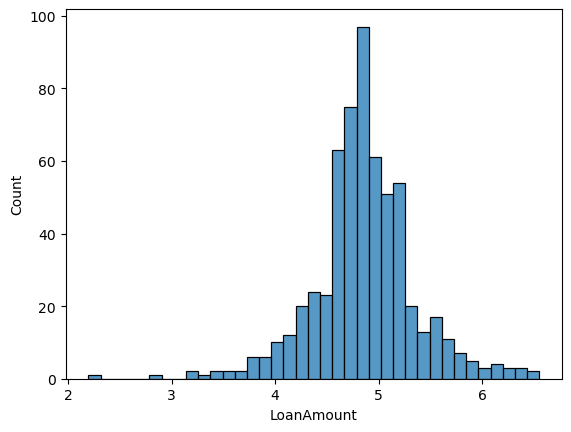

In [47]:
sns.histplot(data['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

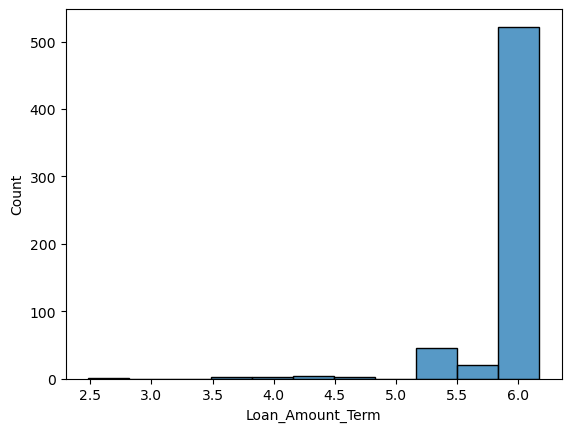

In [48]:
sns.histplot(data['Loan_Amount_Term'])

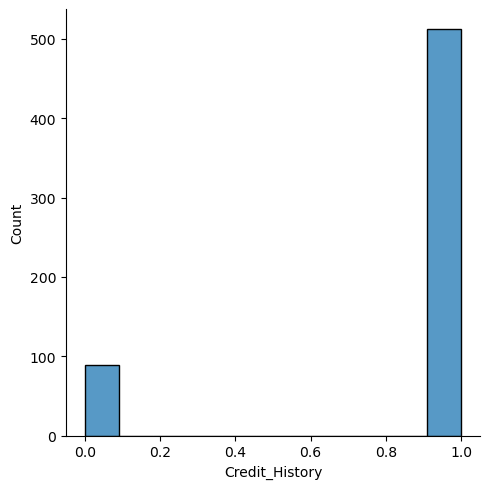

In [49]:
sns.displot(data['Credit_History'])

<AxesSubplot:>

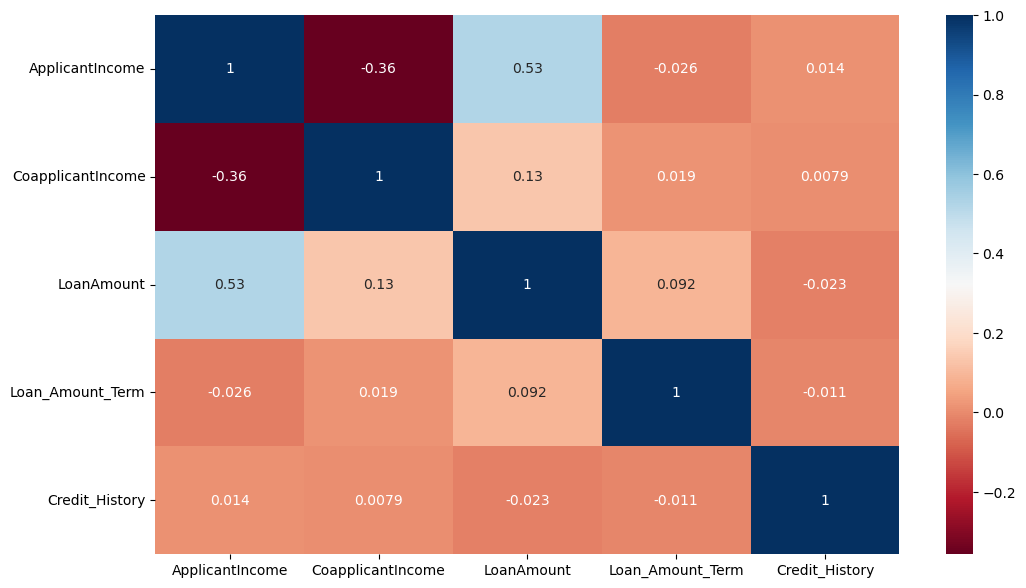

In [50]:
corr=data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True, cmap='RdBu')

In [51]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,4.709874,5.886104,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,5.886104,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,5.192957,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.484797,5.533389,5.886104,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,5.886104,1.0,Urban,Y


In [52]:
# data_to_csv = data.drop(['Loan_ID','Loan_Status'], axis=1)
# data_to_csv

In [53]:
# Preprocess the data
data = pd.get_dummies(data, drop_first=True)

In [55]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,8.674026,0.000000,4.709874,5.886104,1.0,1,0,0,0,0,0,0,0,1,1
1,8.430109,7.319202,4.852030,5.886104,1.0,1,1,1,0,0,0,0,0,0,0
2,8.006368,0.000000,4.189655,5.886104,1.0,1,1,0,0,0,0,1,0,1,1
3,7.856707,7.765993,4.787492,5.886104,1.0,1,1,0,0,0,1,0,0,1,1
4,8.699515,0.000000,4.948760,5.886104,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972466,0.000000,4.262680,5.886104,1.0,0,0,0,0,0,0,0,0,0,1
610,8.320205,0.000000,3.688879,5.192957,1.0,1,1,0,0,1,0,0,0,0,1
611,8.996157,5.484797,5.533389,5.886104,1.0,1,1,1,0,0,0,0,0,1,1
612,8.933664,0.000000,5.231109,5.886104,1.0,1,1,0,1,0,0,0,0,1,1


In [56]:
X = data.drop(['Loan_Status_Y'], axis=1)
y = data['Loan_Status_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()
y_train.head()

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# clf.fit(X_train, y_train, sample_weight=X_train['content_weight'])

# Evaluate the model performance
y_pred = clf.predict(X_test)


score = f1_score(y_test, y_pred, average='binary')
print('F1-score:', score)

F1-score: 0.8187134502923977


In [57]:
import joblib
joblib.dump(clf, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']

In [60]:
# Load the decision tree model from file
clf = joblib.load('loan_prediction_model.pkl')

# Load the column names for the feature variables
columns = pd.read_csv(os.getcwd()+'\\Dataset\\train_u6lujuX_CVtuZ9i.csv', nrows=0).columns[1:-1]
columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [61]:
# Define a function to get user input
def get_input():
    inputs = {}
    for col in columns:
        val = input("Enter {}: ".format(col))
        if col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
            val = float(val)
        elif col == 'Credit_History':
            val = int(val)
        inputs[col] = [val]
    df = pd.DataFrame(inputs)
    # Add missing columns with default values
    for col in X.columns:
        if col not in df.columns:
            df[col] = 0
    # Reorder columns to match training dataset
    df = df[X.columns]
    return df


# Define a function to predict loan approval status
def predict_loan_approval(inputs):
    # Preprocess the input data
    inputs = pd.get_dummies(inputs, drop_first=True)
#     print(inputs)
    # Make predictions using the decision tree model
    y_pred = clf.predict(inputs)
    # Get the reasons for the loan approval decision
    reasons = []
    if y_pred[0] == 0:
        reasons.append('Customer does not meet credit history requirement')
    if y_pred[0] == 1:
        reasons.append('Customer does meet credit history requirement')
    if inputs['ApplicantIncome'].values[0] + inputs['CoapplicantIncome'].values[0] < 5000 and y_pred[0] == 0:
        reasons.append('Customer does not meet income requirement')
    if inputs['ApplicantIncome'].values[0] + inputs['CoapplicantIncome'].values[0] > 5000 and y_pred[0] == 1:
        reasons.append('Customer does meet income requirement')
    if inputs['LoanAmount'].values[0] > 150 and y_pred[0] == 0:
        reasons.append('Customer exceeds loan amount requirement')
    if inputs['Property_Area_Semiurban'].values[0] == 0 and y_pred[0] == 0:
        reasons.append('Customer does not meet property area requirement')
    if inputs['Property_Area_Semiurban'].values[0] == 1 and y_pred[0] == 1:
        reasons.append('Customer does meet property area requirement')    
    return y_pred[0], reasons

# Get user input and make loan approval decision
inputs = get_input()
approval_status, reasons = predict_loan_approval(inputs)

reasons_sentence = ", ".join(reasons)

print("======================================================")
# Print the loan approval decision and reasons
if approval_status == 1:
    print("Loan application approved.")
else:
    print("Loan application denied.")
print("Reasons: {}.".format(reasons_sentence))

Enter Gender: Male
Enter Married: yes
Enter Dependents: 2
Enter Education: Graduate
Enter Self_Employed: no
Enter ApplicantIncome: 2000
Enter CoapplicantIncome: 0
Enter LoanAmount: 20000
Enter Loan_Amount_Term: 360
Enter Credit_History: 1
Enter Property_Area: Semiurban
Loan application approved.
Reasons: Customer does meet credit history requirement.


In [62]:
inputs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,2000.0,0.0,20000.0,360.0,1,0,0,0,0,0,0,0,0,0
